In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import statsmodels.api as sm

<h3>Task 1</h3>

In [54]:
def f(n, p1, p2, prior1, prior2):
    """
    Visualizes the discriminant functions and the decision boundary
    between the two classes.
    
    Params:
    x -- the observations
    p1 -- the probability associated with the Binomial pmf of class 1
    p2 -- the probability associated with the Binomial pmf of class 2
    prior1 -- the prior probability associated with class 1
    prior2 -- the prior probability associated with class 2
    
    Returns:
    None.
    
    Notes:
    - The decision boundary is based on the Bayes classification rule.
    - The decision boundary occurs where these two discriminant functions
      intersect (i.e., where d_1(x) = d_2(x)).
    - At the decision boundary, the Bayes classifier is indifferent between
      assigning the observation x to class C_1 or C_2, because the discriminant
      functions for both classes are equal.
    """
    # The observations x=0,1,...
    x_vals = np.arange(0, n+1)
    
    # The logarithmic discriminant functions for all x
    log_d1 = np.array([x * np.log(p1) + (10 - x) * np.log(1 - p1) + np.log(prior1) for x in x_vals])
    log_d2 = np.array([x * np.log(p2) + (10 - x) * np.log(1 - p2) + np.log(prior2) for x in x_vals])
    
    # 1 if d1 > d2, and 2 otherwise
    bayes_clf = np.where(log_d1 > log_d2, 1, 2)
    
    ##### Plotting #####
    plt.figure(figsize=(8,6))
    
    plt.plot(x_vals, log_d1, label="Discriminant function for class 1", marker="o")
    plt.plot(x_vals, log_d2, label="Discriminant function for class 2", marker="o")
    
    plt.fill_between(x=x_vals, 
                     y1=log_d1,
                     y2=log_d2,
                     where=log_d1>log_d2,
                     color="lightblue",
                     alpha=0.5,
                     label="Classified as class 1")
    plt.fill_between(x=x_vals, 
                     y1=log_d1,
                     y2=log_d2,
                     where=log_d2>=log_d1,
                     color="red",
                     alpha=0.5,
                     label="Classified as class 2")
    
    plt.ylabel("Logarithmic Discriminant Function")
    plt.title("Discriminant Functions and Bayes Classification")
    plt.legend()
    plt.grid(True)
    print("The classifications according to the Bayes classifier:")
    print(bayes_clf)

The classifications according to the Bayes classifier:
[1 1 1 1 1 2 2 2 2 2 2]


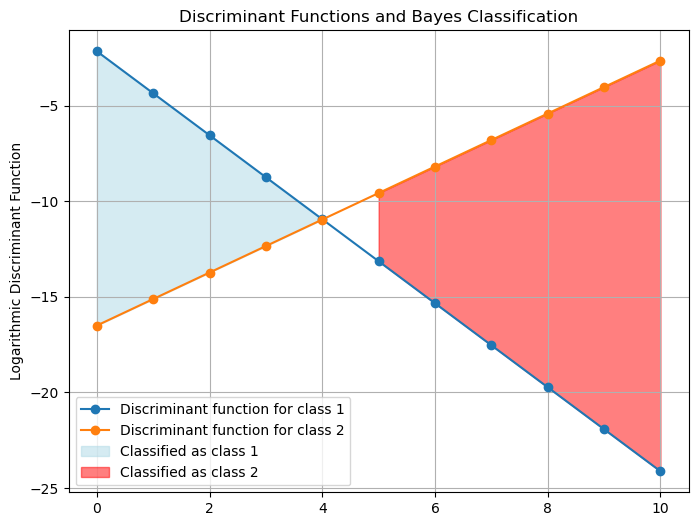

In [61]:
f(n=10, p1=0.1, p2=0.8, prior1=1/3, prior2=2/3)

<h3>Task 4</h3>

In [2]:
iris = load_iris()
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
Y = pd.DataFrame({"species": iris.target})

In [3]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
X.shape

(150, 4)

In [5]:
Y.shape

(150, 1)

In [6]:
Y.value_counts()

species
0          50
1          50
2          50
Name: count, dtype: int64

In [2]:
def preprocess_data(x, y):
    """
    Scales the data and splits it into training and validation sets.
    
    Params:
    x -- features
    y -- labels
    
    Returns:
    X_train -- scaled features used to train the model.
    Y_train -- labels used to train the model.
    X_val -- scaled features used to validate the model results.
    Y_val -- labels used to validate the model results.
    """
    ##### Data splits #####
    # (X, Y) ==> (train | validation) with 80/20 split
    X_train, X_val, Y_train, Y_val = train_test_split(x.values, 
                                                      y.values, 
                                                      test_size=0.2, 
                                                      random_state=42,
                                                      stratify=y)
    ##### Scaling #####
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.fit_transform(X_val)
    
    return X_train, X_val, Y_train.ravel(), Y_val.ravel()

In [8]:
X_train, X_val, Y_train, Y_val = preprocess_data(X, Y)

In [9]:
print("##### Training #####")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of Y_train: {Y_train.shape}")
print()
print("##### Validation #####")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of Y_val: {Y_val.shape}")

##### Training #####
Shape of X_train: (120, 4)
Shape of Y_train: (120,)

##### Validation #####
Shape of X_val: (30, 4)
Shape of Y_val: (30,)


In [10]:
np.unique_counts(Y_train)

UniqueCountsResult(values=array([0, 1, 2]), counts=array([40, 40, 40]))

In [11]:
np.unique_counts(Y_val)

UniqueCountsResult(values=array([0, 1, 2]), counts=array([10, 10, 10]))

- <p style="margin-bottom: 20px;">The stratify parameter in the train_test_split function from the scikit-learn library ensures that the split data has the same distribution of classes as the original dataset.</p>

- <p style="margin-bottom: 20px;"><b>Without</b> specifying $\, \text{stratify}=\text{y_temp} \,$: when you split your data, the distribution of classes in the training and validation sets might be uneven, especially if your dataset is imbalanced (i.e., some classes have significantly more samples than others). This could lead to biased models or models that do not generalize well.</p>

- <p style="margin-bottom: 20px;"><b>With $\, \text{stratify}=\text{y_temp} \,$</b>: <i>the train_test_split</i> function ensures that the training and validation sets have the same proportion of each class as the original dataset y_train. This is important when you have a classification problem and want to maintain the class distribution in both your training and validation sets.</p>

In [12]:
# Create and fit the LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)

LinearDiscriminantAnalysis()

In [13]:
def plot_cm(x, y, model, title):
    y_pred = model.predict(x)
    cm = confusion_matrix(y_true=y, y_pred=y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
    disp.plot(cmap="Blues");
    plt.title(title)
    print(f"Number of missclassifications: {np.sum(y != y_pred)}")

Number of missclassifications: 3


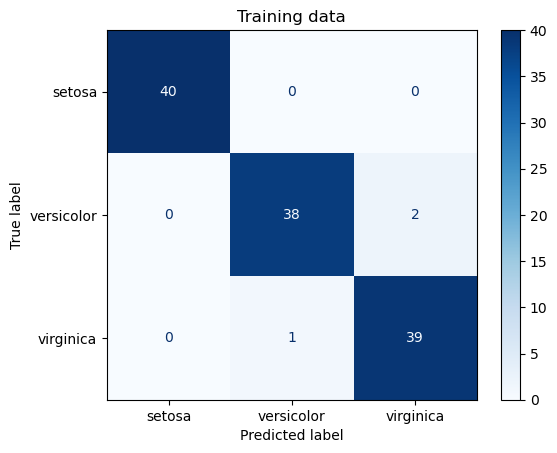

In [14]:
plot_cm(X_train, Y_train, lda, title="Training data")

Number of missclassifications: 1


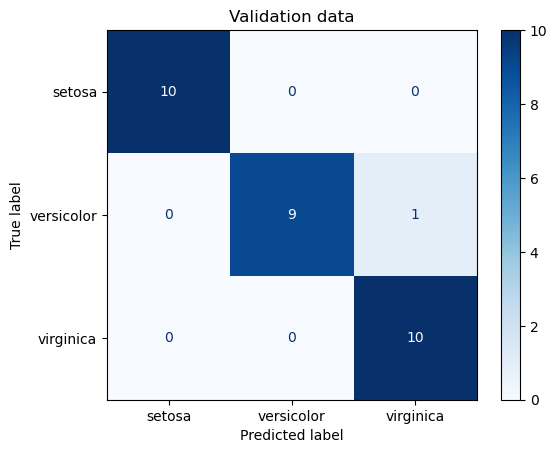

In [15]:
plot_cm(X_val, Y_val, lda, title="Validation data")

<h3>Task 5</h3>

In [3]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df["species"] = iris.target

The species is labelled such that
- 0: setosa
- 1: versicolor
- 2: virginica

In [4]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
iris_df.shape

(150, 5)

In [6]:
iris_df["species"].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [7]:
# Exclude setosa
iris_df_subset = iris_df[(iris_df["species"] == 1) | (iris_df["species"] == 2)]

In [8]:
iris_df_subset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
X_vv = iris_df_subset.drop("species", axis=1)
Y_vv = iris_df_subset["species"]

In [10]:
X_vv.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5


In [11]:
X_vv.shape

(100, 4)

In [12]:
Y_vv.value_counts()

species
1    50
2    50
Name: count, dtype: int64

In [13]:
# Change the labelling
Y_vv = Y_vv.map({1: 0, 2: 1})

In [14]:
Y_vv.value_counts()

species
0    50
1    50
Name: count, dtype: int64

In [15]:
X_vv_train, X_vv_val, Y_vv_train, Y_vv_val = preprocess_data(X_vv, Y_vv)

In [16]:
print("##### Training #####")
print(f"Shape of X_vv_train: {X_vv_train.shape}")
print(f"Shape of Y_v_train: {Y_vv_train.shape}")
print()
print("##### Validation #####")
print(f"Shape of X_vv_val: {X_vv_val.shape}")
print(f"Shape of Y_vv_val: {Y_vv_val.shape}")

##### Training #####
Shape of X_vv_train: (80, 4)
Shape of Y_v_train: (80,)

##### Validation #####
Shape of X_vv_val: (20, 4)
Shape of Y_vv_val: (20,)


In [17]:
# Add intercept terms to X_vv_train, X_vv_val
X_vv_train = sm.add_constant(X_vv_train)
X_vv_val = sm.add_constant(X_vv_val)

In [18]:
print(X_vv_train.shape)
print(X_vv_val.shape)

(80, 5)
(20, 5)


In [19]:
# Fit the model
clf = sm.Logit(Y_vv_train, X_vv_train).fit()

Optimization terminated successfully.
         Current function value: 0.053298
         Iterations 11


In [20]:
clf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   80
Model:                          Logit   Df Residuals:                       75
Method:                           MLE   Df Model:                            4
Date:                Tue, 24 Sep 2024   Pseudo R-squ.:                  0.9231
Time:                        10:32:00   Log-Likelihood:                -4.2638
converged:                       True   LL-Null:                       -55.452
Covariance Type:            nonrobust   LLR p-value:                 3.068e-21
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4477      0.948      0.472      0.637      -1.411       2.306
x1            -1.1384      2.244     -0.507      0.612      -5.536       3.260
x2            -0.8174      2.091     -0.391      0.696      -4.916       3.281
x3             5.5039      4.082      1.348      0.178      -2.496      13.504
x4             6.5176      3.255      2.002      0.045       0.137      12.898
==============================================================================

Possibly complete quasi-separation: A fraction 0.46 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [38]:
def plot_cm2(x, y, model, title):
    y_preds = model.predict(x)
    class_preds = (y_preds > 0.5).astype(int)
    cm = confusion_matrix(y_true=y, y_pred=class_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names[1:])
    disp.plot(cmap="Blues");
    plt.title(title)
    print(f"Number of missclassifications: {np.sum(y != class_preds)}")

Number of missclassifications: 2


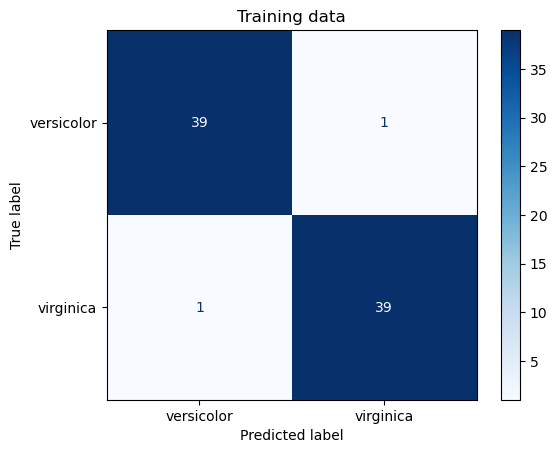

In [39]:
plot_cm2(X_vv_train, Y_vv_train, clf, "Training data")

Number of missclassifications: 1


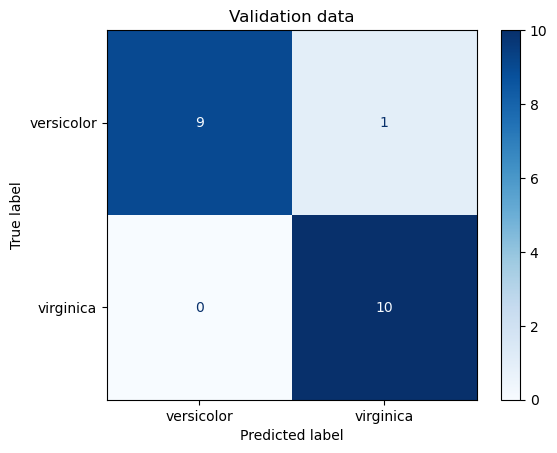

In [40]:
plot_cm2(X_vv_val, Y_vv_val, clf, "Validation data")